# Chapter 1: GemPy Basic

In this first example, we will show how to construct a first basic model and the main objects and functions. First we import gempy:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np

All data get stored in a python object InputData.  This object can be easily stored in a Python pickle. However, these files have the limitation that all dependecies must have the same versions as those when the pickle were created. For these reason to have more stable tutorials we will generate the InputData from raw data---i.e. csv files exported from Geomodeller.

These csv files can be found in the input_data folder in the root folder of GemPy. These tables contains uniquely the XYZ (and poles, azimuth and polarity in the foliation case) as well as their respective formation name (but not necessary the formation order).


In [2]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([0,2000,0,2000,-2000,0],[ 20,20,20],
                         path_f = os.pardir+"/input_data/FabLessPoints_Foliations.csv",
                         path_i = os.pardir+"/input_data/FabLessPoints_Points.csv")

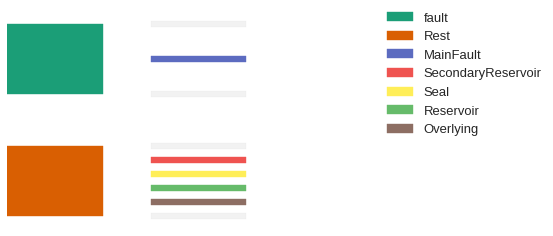

In [3]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"fault":'MainFault', 
                      "Rest": ('SecondaryReservoir','Seal', 'Reservoir', 'Overlying')},
                       order_series = ["fault", 'Rest'],
                       order_formations=['MainFault', 
                                         'SecondaryReservoir', 'Seal','Reservoir', 'Overlying',
                                         ]) 

#geo_data =gp.select_series(geo_data, ['Rest'])

In [4]:
# interp_data.potential_at_interfaces

In [5]:
np.arange(-2,2)

array([-2, -1,  0,  1])

In [6]:
# segm

In [7]:
(94.96507272 - 94.89422466)/2 +94.89422466

94.92964869

In [8]:
# lith_block[1].max(), lith_block[1].min()

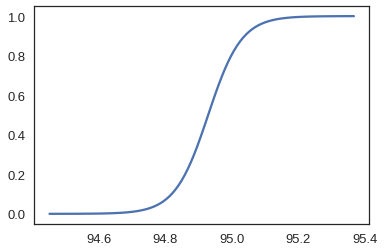

In [9]:
import matplotlib.pyplot as plt
x = np.linspace(94.452444354608565,95.367942466624353,100)
segm = 1./(1+np.exp(-20*(x-94.92964869)))
plt.plot(x,segm)

## The ins and outs of Input data objects

As we have seen objects DataManagement.InputData (usually called geo_data in the tutorials) aim to have all the original geological properties, measurements and geological relations stored. 

Once we have the data ready to generate a model, we will need to create the next object type towards the final geological model:

In [17]:
import theano.tensor as T
import theano
interp_data = gp.InterpolatorInput(geo_data, u_grade=[3,3], output='geology', dtype='float64', compile_theano=False)
print(interp_data)
the = interp_data.interpolator.tg

In [18]:
#the.compute_grad()

In [19]:
input_data_T = the.input_parameters_list()
input_data_T

[Position of the dips,
 Angle of every dip,
 Azimuth,
 Polarity,
 Reference points for every layer,
 Rest of the points of the layers]

In [20]:
th_fn = theano.function(input_data_T,
                         the.compute_grad(1),
                                    on_unused_input='ignore',
                                    allow_input_downcast=False,
                                    profile=False)

In [21]:
i = interp_data.get_input_data()

In [1]:
interp_data.interpolator.pandas_rest_layer_points.head()

NameError: name 'interp_data' is not defined

In [23]:
th_fn(*i)

array([[ -1.04798193e+00,   7.93262910e-08,   3.49327323e-01],
       [  2.09365446e+00,   5.62435538e-08,  -6.97884850e-01],
       [ -3.11319870e+00,  -2.05253550e-07,   1.03773294e+00],
       [  3.38170241e-01,  -4.85235213e-07,  -1.12723833e-01],
       [  8.33825110e-01,  -8.63118422e-02,   2.07178663e+00],
       [ -3.04173769e-01,   2.46716212e-01,   4.90867211e+00],
       [  3.53412033e+00,   3.75501463e+00,   8.28180274e+00],
       [ -2.65578514e+00,   3.36779741e+00,  -1.40136258e+01],
       [ -4.30062553e-01,  -6.01331361e-01,  -5.41273447e-01],
       [ -6.84078709e-02,   7.51566675e-01,   7.42156454e-01],
       [  1.24855671e+00,  -2.80103649e-01,  -3.14260309e+00],
       [  3.24083219e+00,  -8.27124174e+00,   1.33696967e+01],
       [  1.75334742e-01,  -4.97683842e-02,   4.78521713e-01],
       [ -2.38742734e+00,  -1.04323287e-01,  -5.15133092e+00],
       [  6.59915735e-01,   2.68934934e-01,   3.11883189e-01],
       [  2.94606735e+00,  -1.52998177e+00,   6.1443199

In [5]:
lith_block, fault_block = gp.compute_model(interp_data)

In [17]:
lith_block[0][(lith_block[0] > 1 ) * (lith_block[0] < 2)]

array([ 1.33607121,  1.3360607 ,  1.32259466,  1.36315435,  1.32570051,
        1.36315828,  1.32571301,  1.32261482,  1.32883123,  1.35211166,
        1.32651034,  1.36210459,  1.38077374,  1.34584582,  1.36211876,
        1.3807912 ,  1.34586496,  1.3288786 ,  1.35216467,  1.32656485,
        1.33555395,  1.35098665,  1.33310642,  1.38283808,  1.39483975,
        1.36983707,  1.32346932,  1.3458135 ,  1.41187663,  1.41991573,
        1.38995752,  1.33923065,  1.34583578,  1.41190009,  1.41993949,
        1.38997961,  1.33924921,  1.38290965,  1.39490978,  1.36990085,
        1.32352216,  1.33566805,  1.35109609,  1.33320363,  1.34117337,
        1.34892054,  1.3295145 ,  1.35590468,  1.40074542,  1.40669164,
        1.38126762,  1.33466109,  1.39996844,  1.44839014,  1.45140615,
        1.42050958,  1.3675423 ,  1.32393924,  1.42593882,  1.47547   ,
        1.4760083 ,  1.44171644,  1.38518314,  1.32396836,  1.42596797,
        1.47549745,  1.47603346,  1.4417384 ,  1.38520072,  1.40

In [15]:
lith_block[0] < 2

array([False, False, False, ..., False, False, False], dtype=bool)

In [6]:
np.unique(lith_block[0])

array([ 0.        ,  1.3223182 ,  1.32238225, ...,  4.6699562 ,
        4.67004118,  4.67005453])

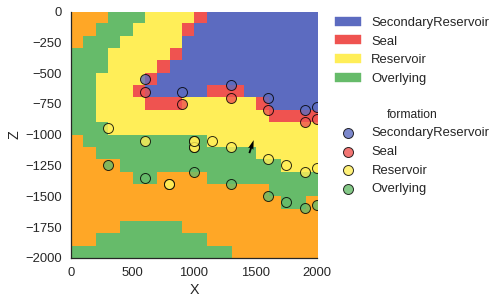

In [7]:
%matplotlib inline
gp.plot_section(geo_data, lith_block[0], 10, plot_data=True)

In [7]:
the.input_parameters_list()

[Position of the dips,
 Angle of every dip,
 Azimuth,
 Polarity,
 Reference points for every layer,
 Rest of the points of the layers]

In [6]:
# cov_jac = T.jacobian(T.flatten(the.block_series()),
#                      the.input_parameters_list()[-1])

In [5]:
gp.set_geophysics_obj(interp_data,  [800,1200,800,1200,-800, -1200],
                                             [5,5])

In [6]:
a,b = gp.precomputations_gravity(interp_data, 24, [2.92, 3.1, 2.92, 2.61, 2.61])

In [5]:
grad = the.compute_grad(0)

In [7]:
grad = the.compute_forward_gravity(1)

In [8]:
#from theano.compile.nanguardmode import NanGuardMode
f =theano.function(the.input_parameters_list(), grad,
              #  mode=NanGuardMode(nan_is_error=True),
                on_unused_input='ignore',
                allow_input_downcast=False,
                profile=False)

In [9]:
f(*interp_data.get_input_data())

array([[  4.24377344e+01,   5.74704591e-06,  -1.41459584e+01],
       [ -3.54464542e+02,   2.18194203e-06,   1.18154780e+02],
       [  2.03092719e+02,  -6.37593421e-06,  -6.76976150e+01],
       [ -1.86894579e+02,  -2.07072494e-05,   6.22979147e+01],
       [ -1.75876853e+03,   7.37631974e+01,  -4.01485449e+03],
       [ -5.38695394e+03,   1.07498103e+03,   7.39245652e+03],
       [  3.97069673e+02,  -1.29363168e+01,  -2.69545535e+03],
       [  3.78083981e+03,   7.58630836e+02,   2.99674499e+03],
       [  6.61312143e+02,   1.37860707e+02,  -3.01317161e+03],
       [ -2.15958350e+03,   5.22041786e+02,   2.65671727e+03],
       [  9.66027218e+03,  -9.35487099e+02,  -7.77072398e+03],
       [ -3.53933748e+03,  -1.03384480e+03,  -4.46406908e+03],
       [  4.65132775e+02,  -1.85817858e+02,   7.36638387e+03],
       [ -1.16442603e+03,  -4.33181147e+02,   2.48227891e+02],
       [  2.24819367e+02,  -6.55996427e+01,   2.29651249e+02],
       [ -2.41488340e+02,   1.40604729e+02,  -2.6054892

In [9]:
f(*interp_data.get_input_data())

array([[ -6.93281805e+00,   7.87886665e-03,  -1.23935939e+01],
       [ -9.11379512e+00,   3.32396902e+00,   1.38218988e+01],
       [  8.14283632e-01,  -8.31449834e-01,  -4.30080906e+00],
       [  6.99781748e+00,   4.66894268e+00,  -1.22325461e+00],
       [ -2.89297772e+00,  -8.51216749e-02,  -1.65076528e+01],
       [ -3.35579139e+00,   1.35674648e+00,   3.99060553e+00],
       [  1.69760630e+01,  -2.92823117e+00,  -1.76672976e+01],
       [ -8.11523840e+00,  -6.08124463e+00,  -5.61967687e+00],
       [  3.68866336e+00,  -7.66082298e-02,   2.62382609e+01],
       [  3.36006771e+00,  -8.32295603e-01,   8.50756030e+00],
       [  6.28715638e-01,  -1.75521167e-01,   2.24480549e-01],
       [  9.18120341e-01,   9.93246348e-01,   3.15695923e+00],
       [  6.78184204e-01,   1.79567896e-01,   1.19679633e+00],
       [ -8.33613053e-01,   3.03046305e+00,  -2.17844535e+00],
       [  4.31645274e-01,  -2.08399946e+00,   9.50812369e+00],
       [  3.70714524e+00,   1.72982125e-01,   1.0384715

In [44]:
f2 =theano.function(the.input_parameters_list(),
                     the.cov_gradients(),
                on_unused_input='ignore',
                allow_input_downcast=False,
                profile=False)

In [45]:
f2(*interp_data.get_input_data())

array([[ 0.34333333,  0.07916434,  0.        ,  0.        ,  0.        ,
         0.06156729],
       [ 0.07916434,  0.34333333,  0.        ,  0.        ,  0.06156729,
         0.        ],
       [ 0.        ,  0.        ,  0.34333333,  0.10401082,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.10401082,  0.34333333,  0.        ,
         0.        ],
       [ 0.        ,  0.06156729,  0.        ,  0.        ,  0.34333333,
        -0.04854728],
       [ 0.06156729,  0.        ,  0.        ,  0.        , -0.04854728,
         0.34333333]])

In [13]:
the.cov_gradients()

Covariance Gradient

In [10]:
interp_data.get_formation_number()

{'DefaultBasement': 0,
 'MainFault': 1,
 'Overlying': 5,
 'Reservoir': 4,
 'Seal': 3,
 'SecondaryReservoir': 2}


By default (there is a flag in case you do not need) when we create a interp_data object we also compile the theano function that compute the model. That is the reason why takes long.

gempy.DataManagement.InterpolatorInput (usually called interp_data in the tutorials) prepares the original data to the interpolation algorithm by scaling the coordinates for better and adding all the mathematical parametrization needed.


In [11]:
gp.get_kriging_parameters(interp_data)

range 0.8882311833686549 3464.10161514
Number of drift equations [2 2]
Covariance at 0 0.01878463416924955
Foliations nugget effect 0.01


 These later parameters have a default value computed from the original data or can be changed by the user (be careful of changing any of these if you do not fully understand their meaning).
 
At this point, we have all what we need to compute our model. By default everytime we compute a model we obtain:

- Lithology block model
    + with the lithology values in 0
    + with the potential field values in 1
- Fault block model
    + with the faults zones values (i.e. every divided region by each fault has one number) in 0
    + with the potential field values in 1

In [12]:
lith_block, fault_block = gp.compute_model(interp_data)

TypeError: Bad input argument to theano function with name "../gempy/DataManagement.py:1008" at index 0 (0-based).  
Backtrace when that variable is created:

  File "/home/miguel/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/miguel/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/miguel/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/miguel/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-0db2147033c5>", line 1, in <module>
    interp_data = gp.InterpolatorInput(geo_data, u_grade=[3,3], dtype='float64')
  File "../gempy/DataManagement.py", line 978, in __init__
    self.interpolator = self.InterpolatorClass(self.geo_data_res, self.geo_data_res.grid, output=output, **kwargs)
  File "../gempy/DataManagement.py", line 1259, in __init__
    self.tg = theanograf.TheanoGraph_pro(output=output, dtype=dtype, verbose=verbose,)
  File "../gempy/theanograf.py", line 111, in __init__
    self.dips_position_all = T.matrix("Position of the dips")
TensorType(float32, matrix) cannot store a value of dtype float64 without risking loss of precision. If you do not mind this loss, you can: 1) explicitly cast your data to float32, or 2) set "allow_input_downcast=True" when calling "function". Value: "array([[ 0.44047179,  0.5001    ,  0.46538256],
       [ 0.57702308,  0.5001    ,  0.46163846]])"

This solution can be plot with the correspondent plotting function. Blocks:

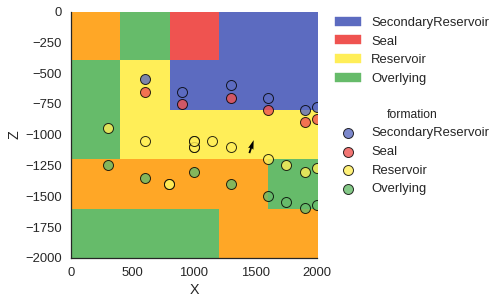

Potential field:

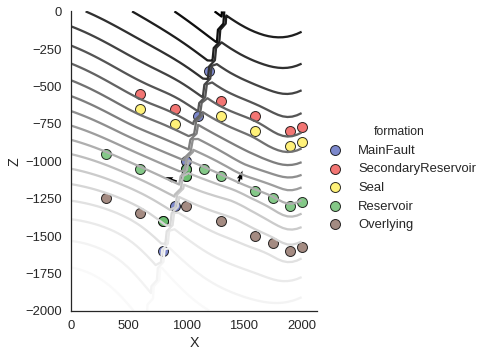

In [17]:
gp.plot_potential_field(geo_data, lith_block[1], 25)

From the potential fields (of lithologies and faults) it is possible to extract vertices and simpleces to create the 3D triangles for a vtk visualization.

In [18]:
ver, sim = gp.get_surfaces(interp_data,lith_block[1], fault_block[1], original_scale=True)

In [19]:
gp.plot_surfaces_3D(geo_data, ver, sim, alpha=1)

Additionally is possible to update the model and recompute the surfaces in real time. To do so, we need to pass the data rescaled. To get an smooth response is important to have the theano optimizer flag in fast_run and run theano in the gpu. This can speed up the modeling time in a factor of 20.

In [20]:
ver_s, sim_s = gp.get_surfaces(interp_data,lith_block[1],
                               fault_block[1],
                               original_scale=False)

In [ ]:
gp.plot_surfaces_3D_real_time(interp_data, ver_s, sim_s)

In the same manner we can visualize the fault block:

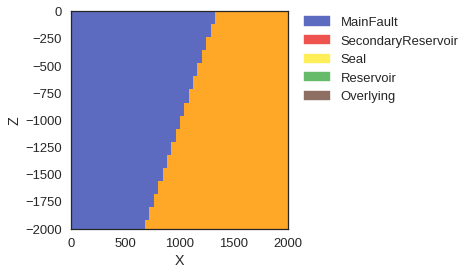

In [22]:
gp.plot_section(geo_data, fault_block[0], 25)

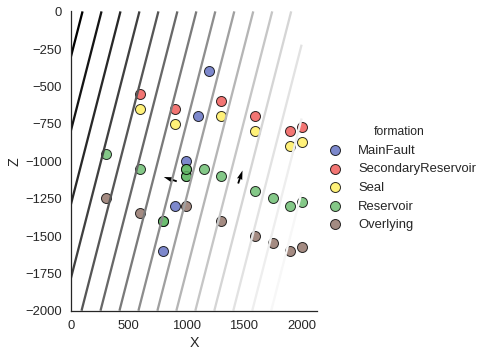

In [23]:
gp.plot_potential_field(geo_data, fault_block[1], 25)